# Logistic Regression Assignment -*-
"""
Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix,auc
import math


In [2]:
# loading data set
df=pd.read_csv('bank-full.csv',sep=";")
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
## EDA--
list(df)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [4]:
df.shape

(45211, 17)

In [5]:
## correlation
df.corr()

C:\Users\Durga Prasad\AppData\Local\Temp\ipykernel_11912\214103158.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# chacking null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
# seperrating numerical and categorical columns
numerical_columns= df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns


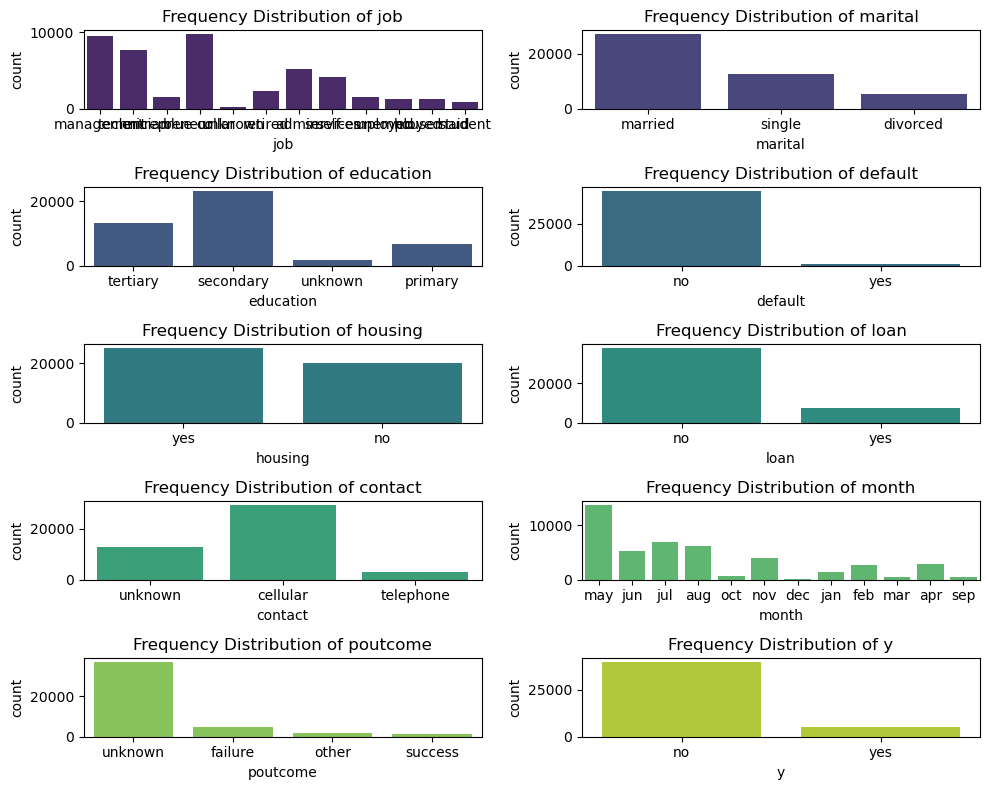

In [10]:
###--frequency distribution plot--
categorical_columns = df.select_dtypes(include=['object']).columns
num_columns = len(categorical_columns)
num_rows = math.ceil(num_columns / 2)
num_cols = min(num_columns, 2)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 8))
hues = sns.color_palette('viridis', n_colors=num_columns)
for i, (column, hue) in enumerate(zip(categorical_columns, hues)):
    row = i // 2
    col = i % 2
    sns.countplot(x=column, data=df, ax=axes[row, col], color=hue)
    axes[row, col].set_title(f'Frequency Distribution of {column}')
for i in range(num_columns, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()


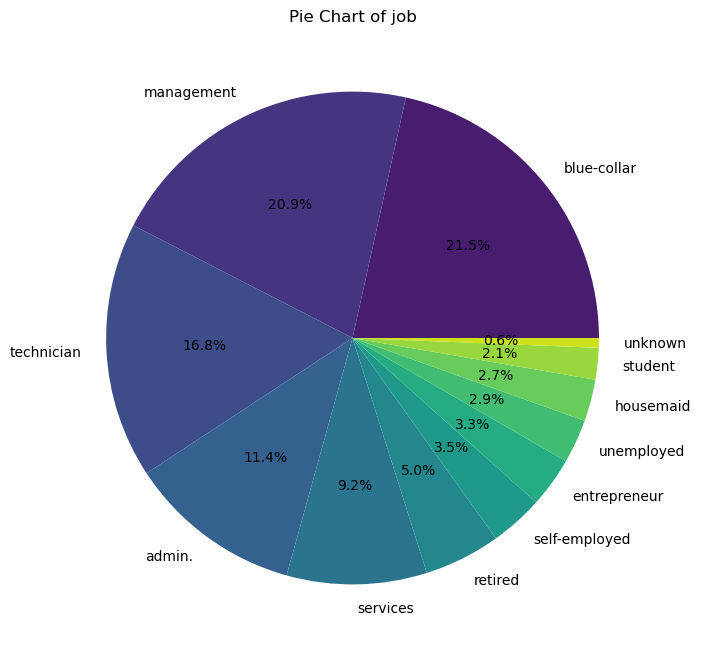

In [11]:
##-- pie charts---
categorical_columns = categorical_columns[0]
category_counts = df[categorical_columns].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', n_colors=len(category_counts)))
plt.title(f'Pie Chart of {categorical_columns}')
plt.show()


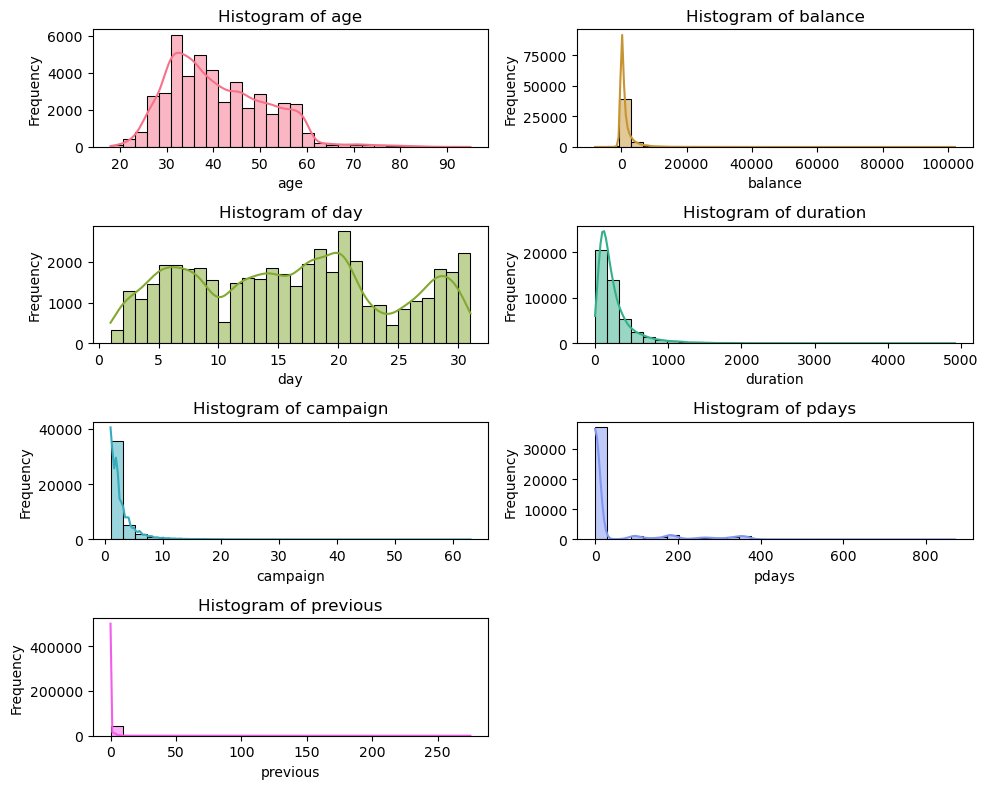

In [12]:
#---- HISTOGRAM FOR NUMERICAL VALUES---##
nc = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
num_columns = len(nc)
num_rows = math.ceil(num_columns / 2)
num_cols = min(num_columns, 2)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 8))
colors = sns.color_palette('husl', n_colors=num_columns)
for i, (column, color) in enumerate(zip(nc, colors)):
    row = i // 2
    col = i % 2
    sns.histplot(df[column], bins=30, kde=True, color=color, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
for i in range(num_columns, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()


In [17]:
#---- X & Y-- variables---##
y=df['y']
x=df.iloc[:,0:16]


In [ ]:
LE = LabelEncoder()
for col in categorical_columns:
    df[col] = LE.fit_transform(df[col])
df[categorical_columns]


In [18]:
# Standardization
ss = StandardScaler()
ss_x = ss.fit_transform(df[numerical_columns])
pd.DataFrame(ss_x)


,0,1,2,3,4,5,6
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940
...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940


In [19]:
# Logistic Regression model fitting 
logreg = LogisticRegression()

logreg.fit(ss_x,y)
y_pred = logreg.predict(ss_x)


In [21]:
## train test and data partion 
training_accuracy = []
test_accuracy = []

for i in range(1, 101):
    x_train, x_test, y_train, y_test = train_test_split(ss_x, y, test_size=0.3,random_state=i)
    logreg = LogisticRegression()
    logreg.fit(x_train, y_train)
    y_pred_train = logreg.predict(x_train)
    y_pred_test = logreg.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))


In [22]:
## printing train,test accuracys and variance:
print("Average training_accuracy :",np.mean(training_accuracy).round(3))
print("Average test_accuracy:",np.mean(test_accuracy).round(3))
print("Variance",np.mean(training_accuracy).round(3)-np.mean(test_accuracy).round(3))


Average training_accuracy : 0.889
Average test_accuracy: 0.889
Variance 0.0


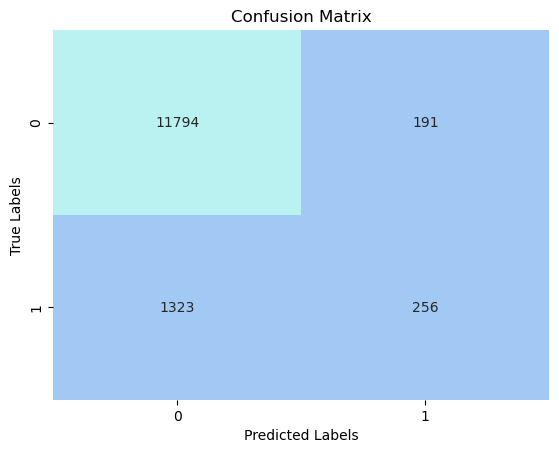

Accuacy score: 0.889


In [23]:
### -- confusion matrix---##
cm = confusion_matrix(y_test, y_pred_test)
cmap = sns.color_palette("pastel") 
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print("Accuacy score:", accuracy_score(y,y_pred).round(3))


In [25]:
# exact probabilities
logreg.predict_proba(ss_x) 
Y_probabilities = logreg.predict_proba(ss_x)[:,1:]



In [28]:
y_numerical = (y == 'yes').astype(int)
fpr, tpr, dummy = roc_curve(y_numerical, Y_probabilities)


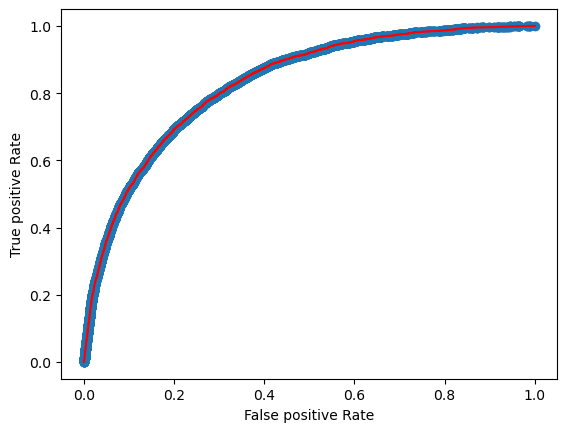

AUC score: 0.83


In [29]:
##-- ROC curve plot
plt.scatter(x = fpr,y=tpr)
plt.plot(fpr,tpr,color='red')
plt.ylabel("True positive Rate")
plt.xlabel("False positive Rate")
plt.show()
print("AUC score:", roc_auc_score(y,Y_probabilities).round(3))


In [30]:
### --- ROC WITH VARIATION PLOT----###
Y_probabilities = logreg.predict_proba(ss_x)[:, 1]
fpr, tpr, thresholds = roc_curve(y_numerical, Y_probabilities)


In [31]:
# Calculate Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

0.8304395168233567

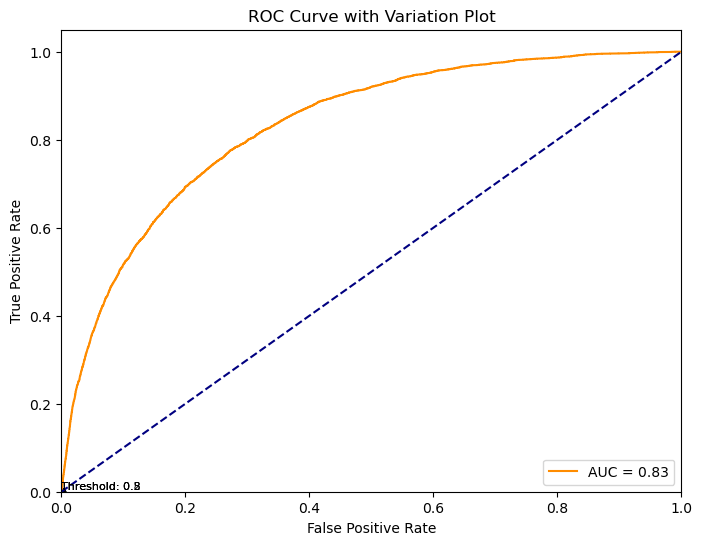

In [32]:
# Variation plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc:.2f}')
threshold_points = [0.2, 0.5, 0.8]
for threshold in threshold_points:
    idx = next(i for i, t in enumerate(thresholds) if t >= threshold)
    plt.scatter(fpr[idx], tpr[idx], marker='o', color='black')
    plt.text(fpr[idx], tpr[idx], f'Threshold: {threshold:.1f}', fontsize=8, verticalalignment='bottom')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Variation Plot')
plt.legend(loc="lower right")
plt.show()
